# Scenario 1

Suppose that you are given a printed paper that represent a map of a fictitious world...

In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from matplotlib import cm

In [2]:
color_pal = ["#6600CC", "#CC33FF", "#FF66CC"]
cmap_colors = ["#6600CC", "#9933ff", "#cc33ff", "#ff00ff", "#ff66ff", "#ff99ff"]

['#6600CC', '#9933ff', '#cc33ff', '#ff00ff', '#ff66ff', '#ff99ff']

In [3]:
#The likelihood of l=2 in n=8 trials for p=0.5
print("The likelyhood of l=3 in 8 trials is:",stats.binom.pmf(2, n=8, p=0.5))

#The likelihood of l=6 in n=8 trials for p=0.5
print("The likelyhood of l=6 in 8 trials is:",stats.binom.pmf(6, n=8, p=0.5))

#The likelihood of l=5 in n=8 trials for p=0.5
print("The likelyhood of l=5 in 8 trials is:",stats.binom.pmf(5, n=8, p=0.5))

The likelyhood of l=3 in 8 trials is: 0.10937500000000006
The likelyhood of l=6 in 8 trials is: 0.10937500000000006
The likelyhood of l=5 in 8 trials is: 0.21875000000000014


In [4]:
def posterior_grid_approx(grid_points, success, tosses, p):
    #1. define grid
    p_grid = np.linspace(0, 1, grid_points)

    #2. define prior
    prior = p

    #3. compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    #4. compute product of likelihood and prior
    raw_posterior = likelihood * prior

    #5. standardize the posterior, so it sums to 1b
    posterior = raw_posterior / raw_posterior.sum()
    return p_grid, posterior

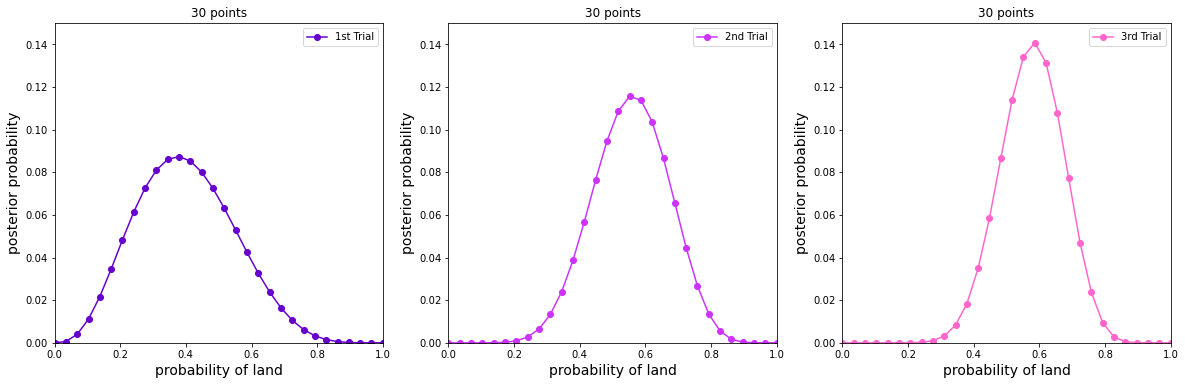

In [5]:
plt.figure(figsize=(20,20))

# L,W,L,W,W,L,W,W (1st Trial)
points = 30
l, n = 3, 8
p = np.repeat(5,30)
p_grid, posterior1 = posterior_grid_approx(points, l, n, p)
plt.subplot(3,3,1)            
plt.plot(p_grid, posterior1, 'o-', label='1st Trial', color=color_pal[0])
plt.xlabel('probability of land', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.xlim([0,1])
plt.ylim([0,0.15])
plt.title('{} points'.format(points))
plt.legend(loc=0);

# W,L,W,L,L,L,L,L (2nd Trial)
points = 30
l, n = 6, 8
p = posterior1 # using the posterior distribution of 1st trial as prior for 2nd trial
p_grid, posterior2 = posterior_grid_approx(points, l, n, p)
plt.subplot(3,3,2)            
plt.plot(p_grid, posterior2, 'o-', label='2nd Trial', color=color_pal[1])
plt.xlabel('probability of land', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.xlim([0,1])
plt.ylim([0,0.15])
plt.title('{} points'.format(points))
plt.legend(loc=0);

# L,W,W,L,L,L,L,W (3rd Trial)
points = 30
l, n = 5, 8
p = posterior2 # using the posterior distribution of 2nd trial as prior for 3rd trial
p_grid, posterior3 = posterior_grid_approx(points, l, n, p)
plt.subplot(3,3,3)            
plt.plot(p_grid, posterior3, 'o-', label='3rd Trial', color=color_pal[2])
plt.xlabel('probability of land', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.xlim([0,1])
plt.ylim([0,0.15])
plt.title('{} points'.format(points))
plt.legend(loc=0);

In [6]:
print("The plausibility of each proportion of land is", round(max(posterior3), 3))

The plausibility of each proportion of land is 0.141


# Scenario 2

You may have some experience of travelling to and from the airport...

In [7]:
df1 = pd.read_csv("uber-apr14-10 days.csv")
df2 = pd.read_csv("uber-may14-10 days.csv")
df3 = pd.read_csv("uber-jun14-10 days.csv")

# Merging the dataframes into one
df = df1.append([df2, df3], ignore_index=True)

# Convert Date/Time to datetime
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime)

# Add columns for month, day of week, day, hour, and minute
df["Month"] = df["Date/Time"].dt.month_name().str[:3]
df["Day"] = df["Date/Time"].dt.day_name().str[:3]
df["Hour"] = df["Date/Time"].dt.hour
df["Minute"] = df["Date/Time"].dt.minute
df["nDays"] = df["Date/Time"].dt.day
df

,Date/Time,Lat,Lon,Base,Month,Day,Hour,Minute,nDays
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Apr,Tue,0,11,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Apr,Tue,0,17,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Apr,Tue,0,21,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Apr,Tue,0,28,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Apr,Tue,0,33,1
...,...,...,...,...,...,...,...,...,...
324989,2014-06-10 23:58:00,40.7768,-73.9774,B02598,Jun,Tue,23,58,10
324990,2014-06-10 23:58:00,40.7443,-73.9807,B02598,Jun,Tue,23,58,10
324991,2014-06-10 23:59:00,40.7575,-73.9759,B02598,Jun,Tue,23,59,10
324992,2014-06-10 23:59:00,40.7265,-73.9832,B02598,Jun,Tue,23,59,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324994 entries, 0 to 324993
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  324994 non-null  datetime64[ns]
 1   Lat        324994 non-null  float64       
 2   Lon        324994 non-null  float64       
 3   Base       324994 non-null  object        
 4   Month      324994 non-null  object        
 5   Day        324994 non-null  object        
 6   Hour       324994 non-null  int64         
 7   Minute     324994 non-null  int64         
 8   nDays      324994 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 22.3+ MB


In [9]:
# Trips by hour and month (Stacked bar chart)

# Group by hour and month
df_hour_and_month = df.groupby(["Hour", "Month"]).count()

df_hour_month_group = pd.DataFrame({"Num_of_trips":df_hour_and_month.values[:,1]}, index = df_hour_and_month.index)
df_hour_month_group.head(10)

# Reset the index
df_hour_month_group.reset_index(inplace=True)
df_hour_month_group.head()

,Hour,Month,Num_of_trips
0,0,Apr,1619
1,0,Jun,2384
2,0,May,2489
3,1,Apr,947
4,1,Jun,1408


In [10]:
# Prepare data for number of trips
hour_and_month_data = df_hour_month_group["Num_of_trips"].values.reshape(24,3)
hour_and_month_data

array([[ 1619,  2384,  2489],
       [  947,  1408,  1446],
       [  582,   957,   951],
       [  655,  1069,  1081],
       [  858,  1297,  1218],
       [ 1413,  2049,  1965],
       [ 3005,  4081,  3705],
       [ 3965,  5555,  4930],
       [ 3474,  5312,  4704],
       [ 2749,  4413,  3774],
       [ 2771,  4331,  3877],
       [ 2946,  4405,  4112],
       [ 3074,  4591,  4355],
       [ 3559,  5234,  5327],
       [ 4236,  6124,  6525],
       [ 5507,  7375,  8348],
       [ 6596,  8708,  9600],
       [ 7386,  8931, 10086],
       [ 6852,  7595,  9706],
       [ 6136,  6339,  7976],
       [ 5520,  6560,  7446],
       [ 5635,  6811,  7845],
       [ 4444,  5816,  6850],
       [ 2847,  3658,  4899]], dtype=int64)

In [11]:
df_hour_month_group = pd.DataFrame(data = hour_and_month_data, index = df_hour_month_group["Hour"].unique(), columns = df["Month"].unique())
df_hour_month_group.head()

,Apr,May,Jun
0,1619,2384,2489
1,947,1408,1446
2,582,957,951
3,655,1069,1081
4,858,1297,1218


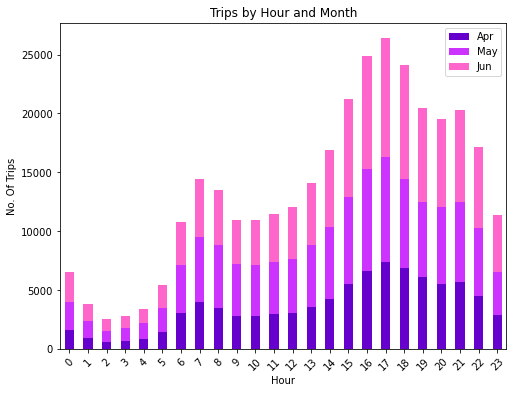

In [12]:
# Plot the stacked bar chart
df_hour_month_group.plot(kind="bar", figsize=(8,6), stacked=True, color=color_pal)
plt.xticks(rotation=45)
plt.xlabel("Hour")
plt.ylabel("No. Of Trips")
plt.title("Trips by Hour and Month")
plt.show()

(array([0, 1]), [Text(0, 0, 'B02598'), Text(1, 0, 'B02512')])

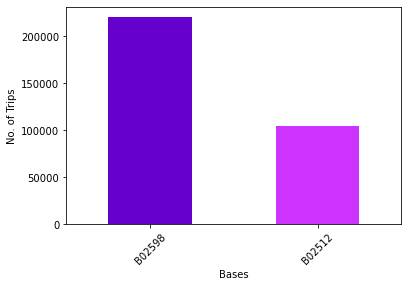

In [13]:
df_bases = df["Base"].value_counts()
df_bases.plot(kind="bar", color=color_pal)
plt.xlabel("Bases")
plt.ylabel("No. of Trips")
plt.xticks(rotation=45)

In [14]:
def Rows(r):
    return len(r)

In [15]:
# Group by hour and day
df_hour_and_day = df.groupby("Hour nDays".split()).apply(Rows).unstack()
df_hour_and_day = df_hour_and_day.drop(columns = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
df_hour_and_day.head()

nDays,1,2,3,4,5,6,7,8,9,10
Hour,,,,,,,,,,
0,639,282,534,710,428,778,510,610,317,505
1,401,150,317,381,235,488,287,371,198,274
2,246,118,174,252,155,279,186,249,174,211
3,253,191,186,246,224,245,224,245,248,219
4,233,296,240,274,305,291,256,257,375,257


[Text(0.5, 1.0, 'Trips by Hour and Day')]

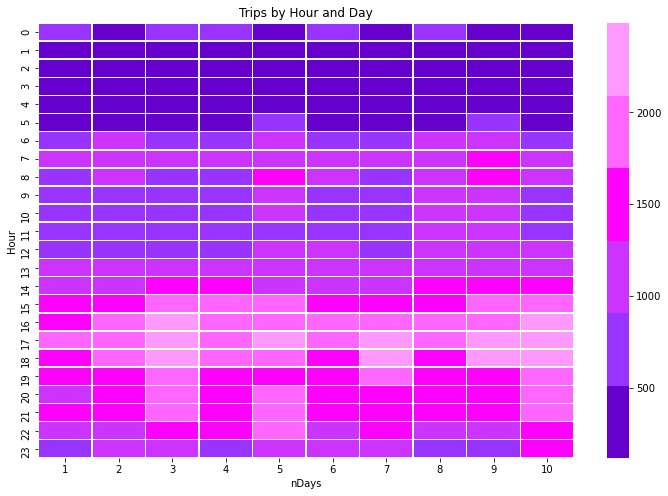

In [16]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_hour_and_day, cmap=cmap_colors, linewidth=0.5)
ax.set(title="Trips by Hour and Day")

In [17]:
# Group by day and month
df_month_and_day = df.groupby("Month Day".split()).apply(Rows).unstack()
df_month_and_day.head()

Day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
Apr,12703,9281,10173,6894,17053,14390,16282
Jun,14420,20274,11606,15929,17025,21985,13764
May,27276,10791,23822,8570,26770,12247,13739


[Text(0.5, 1.0, 'Trips by Hour and Day')]

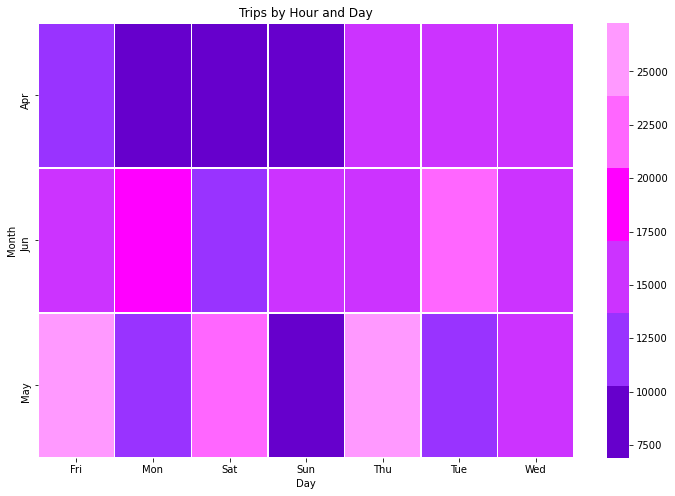

In [18]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df_month_and_day, cmap=cmap_colors, linewidth=0.5)
ax.set(title="Trips by Hour and Day")

In [19]:
# Heatmap Map for rides during 2014 Apr-Jun and by bases
# Get Lon and Lat values in the data
Longi = df["Lon"].values
Lati = df["Lat"].values

array([40.769 , 40.7267, 40.7316, ..., 40.7575, 40.7265, 40.6668])

In [20]:
# drop duplicates
df_dropped = df.drop_duplicates(["Lat", "Lon"])

Longi_Dropped = df_dropped["Lon"]
Lati_Dropped = df_dropped["Lat"]

0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
           ...   
324964    40.7003
324980    40.7432
324982    40.8098
324983    40.7458
324986    40.7902
Name: Lat, Length: 136156, dtype: float64

In [21]:
# Get lon and lat values for both bases in the dataset
Longi_dropped_base1 = df_dropped["Lon"].loc[df_dropped["Base"] == "B02512"].values
Lati_dropped_base1 = df_dropped["Lat"].loc[df_dropped["Base"] == "B02512"].values

Longi_dropped_base2 = df_dropped["Lon"].loc[df_dropped["Base"] == "B02598"].values
Lati_dropped_base2 = df_dropped["Lat"].loc[df_dropped["Base"] == "B02598"].values

array([40.7637, 40.7188, 40.7444, ..., 40.8098, 40.7458, 40.7902])

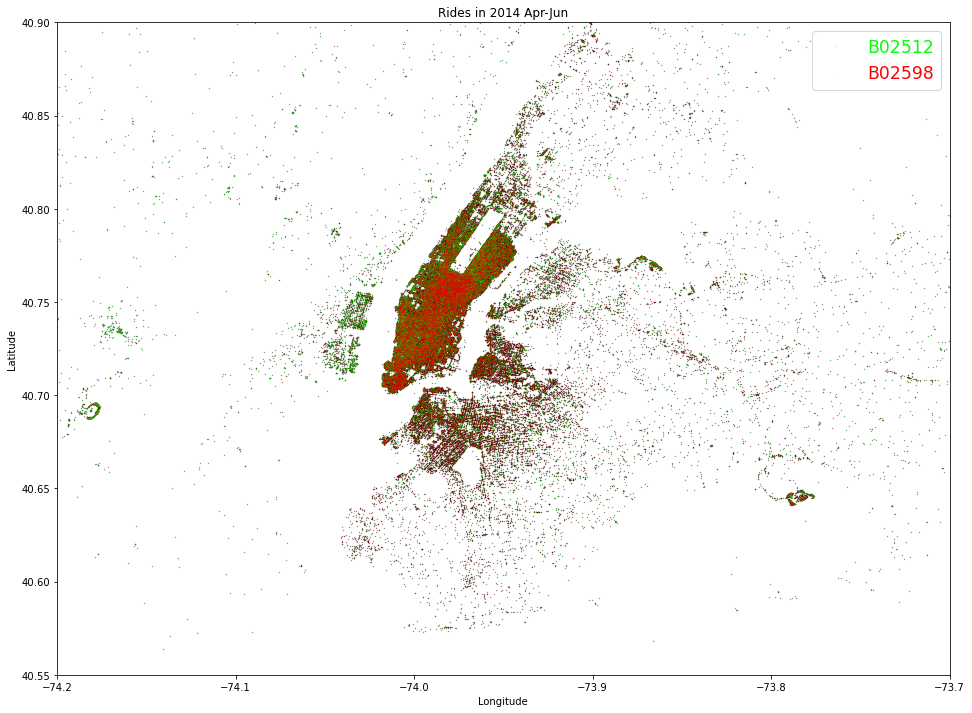

In [22]:
plt.figure(figsize=(16, 12))

plt.plot(Longi_Dropped, Lati_Dropped, ".", ms=.5, alpha=0.7, color="black")
plt.plot(Longi_dropped_base1, Lati_dropped_base1, ".", ms=.5, alpha=0.5, color="lime", label="B02512")
plt.plot(Longi_dropped_base2, Lati_dropped_base2, ".", ms=.5, alpha=0.2, color="red", label="B02598")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Rides in 2014 Apr-Jun")
plt.ylim(40.55, 40.9)
plt.xlim(-74.2, -73.7)

plt.legend(loc=1, labelcolor="mfc", fontsize="xx-large")

plt.show()

# Scenario 3

You are given a box of dice that contains a 4-sided die, a 6-sided die, an 8-sided die...

# Ans:
p(H) in this scenario is the probability of the dice being rolled (The prior)

p(D|H) in this scenario is the the likelihood of a dice being rolled based on the number that is rolled

p(H|D) in this scenario is the posterior of getting a number based on the dice being rolled

In [23]:
class BayesTable(pd.DataFrame):
    def __init__(self, hypo, prior):
        columns = ['hypo', 'prior', 'likelihood', 'posterior', 'norm_posterior']
        super().__init__(columns=columns)
        self.hypo = hypo
        self.prior = prior
    
    def mult(self):
        self.posterior = self.prior * self.likelihood
        
    def norm(self):
        nc = np.sum(self.posterior)
        self.norm_posterior = self.posterior / nc
        return nc
    
    def update(self):
        self.mult()
        return self.norm()
    
    def reset(self):
        return BayesTable(self.hypo, self.norm_posterior)

In [24]:
def sequence(s, d, t):
    table = t
    x = [] # empty list to store likelihood
    y = [] # empty list to store norm_posterior
    
    for i in range(len(s)):
        print("Rolled number:", s[i], "\n") # Shows the current number in the sequence
        
        # loops through the dieFaces and checks whether the number
        # in the sequence is bigger than the die faces or smaller
        # then round up the results to 3 decimal points
        for j in range(len(d)):
            if s[i] > d[j]:
                temp = round(0/d[j], 3)
            else:
                temp = round(1/d[j], 3)
            x.append(temp) # Append all the likelihood numbers to an empty list
            
        table.likelihood = x
        table.update()
        print(table, "\n")
        
        print("Highest normalized posterior:", round(max(table.norm_posterior), 3), "\n")
        y.append(round(max(table.norm_posterior), 3))
        x = [] # Clears x for next set of likelihoods
    
        for j in range(len(table)):
            if table.loc[j].norm_posterior == max(table.norm_posterior):
                print("\nMost likely picked:", table.loc[j].hypo, " | Normalized Posterior:", round(max(table.norm_posterior), 3))
                
        print("\n=======================================================================\n")

In [25]:
# Setting up the prior for each die. It is a fair chance therefore it is 0.2
table = BayesTable(["4-Sided Die", "6-Sided Die", "8-Sided Die", "12-Sided Die", "20-Sided Die"], [0.2, 0.2, 0.2, 0.2, 0.2])

d = [4,6,8,12,20] # Die Faces
s1 = [6,8,7,7,5,4] # 1st Sequence
s2 = [6,8,9,10,7] # 2nd Sequence

[6, 8, 9, 10, 7]

# Q1. 
<p><strong>Question 1</strong>: Possibility of rolling a 6</p>

In [26]:
# Possibility of rolling all the dice if you rolled a 6
table.likelihood = [0/4, 1/6, 1/8, 1/12, 1/20]
table.mult()
table.norm()
print(table)

for i in range(len(table)):
    if table.loc[i].norm_posterior == max(table.norm_posterior):
        print("\nMost likely picked:", table.loc[i].hypo, " | Normalized Posterior:", round(max(table.norm_posterior), 3))

           hypo  prior  likelihood  posterior  norm_posterior
0   4-Sided Die    0.2    0.000000   0.000000        0.000000
1   6-Sided Die    0.2    0.166667   0.033333        0.392157
2   8-Sided Die    0.2    0.125000   0.025000        0.294118
3  12-Sided Die    0.2    0.083333   0.016667        0.196078
4  20-Sided Die    0.2    0.050000   0.010000        0.117647

Most likely picked: 6-Sided Die  | Normalized Posterior: 0.392


# Q2
<p><strong>Question 2</strong>: Which die was mostly picked is the dice is rolled and the sequence is 6, 8, 7, 7, 5, 4</p>

In [27]:
sequence(s1, d, table)

Rolled number: 6 

           hypo  prior  likelihood  posterior  norm_posterior
0   4-Sided Die    0.2       0.000     0.0000        0.000000
1   6-Sided Die    0.2       0.167     0.0334        0.392941
2   8-Sided Die    0.2       0.125     0.0250        0.294118
3  12-Sided Die    0.2       0.083     0.0166        0.195294
4  20-Sided Die    0.2       0.050     0.0100        0.117647 

Highest normalized posterior: 0.393 


Most likely picked: 6-Sided Die  | Normalized Posterior: 0.393


Rolled number: 8 

           hypo  prior  likelihood  posterior  norm_posterior
0   4-Sided Die    0.2       0.000     0.0000        0.000000
1   6-Sided Die    0.2       0.000     0.0000        0.000000
2   8-Sided Die    0.2       0.125     0.0250        0.484496
3  12-Sided Die    0.2       0.083     0.0166        0.321705
4  20-Sided Die    0.2       0.050     0.0100        0.193798 

Highest normalized posterior: 0.484 


Most likely picked: 8-Sided Die  | Normalized Posterior: 0.484


Rolled

# Q3
<p><strong>Question 3</strong>: Which die was mostly picked if the dice is rolled and the sequence is 6, 8, 9, 10, 7</p>

In [28]:
sequence(s2, d, table)

Rolled number: 6 

           hypo  prior  likelihood  posterior  norm_posterior
0   4-Sided Die    0.2       0.000     0.0000        0.000000
1   6-Sided Die    0.2       0.167     0.0334        0.392941
2   8-Sided Die    0.2       0.125     0.0250        0.294118
3  12-Sided Die    0.2       0.083     0.0166        0.195294
4  20-Sided Die    0.2       0.050     0.0100        0.117647 

Highest normalized posterior: 0.393 


Most likely picked: 6-Sided Die  | Normalized Posterior: 0.393


Rolled number: 8 

           hypo  prior  likelihood  posterior  norm_posterior
0   4-Sided Die    0.2       0.000     0.0000        0.000000
1   6-Sided Die    0.2       0.000     0.0000        0.000000
2   8-Sided Die    0.2       0.125     0.0250        0.484496
3  12-Sided Die    0.2       0.083     0.0166        0.321705
4  20-Sided Die    0.2       0.050     0.0100        0.193798 

Highest normalized posterior: 0.484 


Most likely picked: 8-Sided Die  | Normalized Posterior: 0.484


Rolled